## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
import pickle

In [30]:
import warnings
warnings.filterwarnings('ignore')


## 2. Read the data 

In [3]:
books = pd.read_csv('../Data/books_script.csv')
books.head()

,Title,Category,Rating,Price,Availability
0,A Light in the Attic,Poetry,Three,£51.77,In stock (22 available)
1,Tipping the Velvet,Historical Fiction,One,£53.74,In stock (20 available)
2,Soumission,Fiction,One,£50.10,In stock (20 available)
3,Sharp Objects,Mystery,Four,£47.82,In stock (20 available)
4,Sapiens: A Brief History of Humankind,History,Five,£54.23,In stock (20 available)


In [4]:
books.shape

(1000, 5)

### Standardize header 

In [5]:
books.columns = books.columns.str.lower()
books

,title,category,rating,price,availability
0,A Light in the Attic,Poetry,Three,£51.77,In stock (22 available)
1,Tipping the Velvet,Historical Fiction,One,£53.74,In stock (20 available)
2,Soumission,Fiction,One,£50.10,In stock (20 available)
3,Sharp Objects,Mystery,Four,£47.82,In stock (20 available)
4,Sapiens: A Brief History of Humankind,History,Five,£54.23,In stock (20 available)
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,One,£55.53,In stock (1 available)
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,Four,£57.06,In stock (1 available)
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,Five,£16.97,In stock (1 available)
998,1st to Die (Women's Murder Club #1),Mystery,One,£53.98,In stock (1 available)


## 3. Preprocessing the data

### Handling Missing Values

In [6]:
books.isnull().sum()

title           0
category        0
rating          0
price           0
availability    0
dtype: int64

### Data Type Conversion

In [7]:
books.dtypes

title           object
category        object
rating          object
price           object
availability    object
dtype: object

In [8]:
books['rating'].unique()

array(['Three', 'One', 'Four', 'Five', 'Two'], dtype=object)

In [9]:
# Define a mapping for rating conversion
rating_mapping = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five":5
}

# Convert the "Rating" column using the mapping
books['rating'] = books['rating'].map(rating_mapping)

In [10]:
books['availability'].unique()

array(['In stock (22 available)', 'In stock (20 available)',
       'In stock (19 available)', 'In stock (18 available)',
       'In stock (17 available)', 'In stock (16 available)',
       'In stock (15 available)', 'In stock (14 available)',
       'In stock (13 available)', 'In stock (12 available)',
       'In stock (11 available)', 'In stock (10 available)',
       'In stock (9 available)', 'In stock (8 available)',
       'In stock (7 available)', 'In stock (6 available)',
       'In stock (5 available)', 'In stock (4 available)',
       'In stock (3 available)', 'In stock (2 available)',
       'In stock (1 available)'], dtype=object)

In [11]:
# Extract the number from the "Availability" column
books['availability'] = books['availability'].str.extract('(\d+)').astype(int)

In [12]:
# Remove the currency symbol and any non-numeric characters
books['price'] = books['price'].str.replace('£', '').astype(float)


In [13]:
books.head()

,title,category,rating,price,availability
0,A Light in the Attic,Poetry,3,51.77,22
1,Tipping the Velvet,Historical Fiction,1,53.74,20
2,Soumission,Fiction,1,50.10,20
3,Sharp Objects,Mystery,4,47.82,20
4,Sapiens: A Brief History of Humankind,History,5,54.23,20


### Encoding Categorical Variables

In [14]:
# Perform one-hot encoding on the "Category" column
encoded_books = pd.get_dummies(books, columns=['category'], dtype = int)
encoded_books

,title,rating,price,availability,category_Academic,category_Add a comment,category_Adult Fiction,category_Art,category_Autobiography,category_Biography,...,category_Self Help,category_Sequential Art,category_Short Stories,category_Spirituality,category_Sports and Games,category_Suspense,category_Thriller,category_Travel,category_Womens Fiction,category_Young Adult
0,A Light in the Attic,3,51.77,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Tipping the Velvet,1,53.74,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Soumission,1,50.10,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sharp Objects,4,47.82,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sapiens: A Brief History of Humankind,5,54.23,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,1,55.53,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",4,57.06,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
997,A Spy's Devotion (The Regency Spies of London #1),5,16.97,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,1st to Die (Women's Murder Club #1),1,53.98,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
type(encoded_books)

pandas.core.frame.DataFrame

### Normalizing Numerical Features

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize the selected columns
columns_to_scale = list(encoded_books.columns)[1:] # [n:]
encoded_books_np = scaler.fit_transform(encoded_books[columns_to_scale])

# Save the scaler in the "scalers" folder using pickle
path = "../Scalers/standard_scaler.pkl"
with open(path, "wb") as file:
    pickle.dump(scaler, file)

encoded_books_scaled_df = pd.DataFrame(encoded_books_np, columns = columns_to_scale, index = encoded_books.index)
encoded_books_scaled_df.head()

,rating,price,availability,category_Academic,category_Add a comment,category_Adult Fiction,category_Art,category_Autobiography,category_Biography,category_Business,...,category_Self Help,category_Sequential Art,category_Short Stories,category_Spirituality,category_Sports and Games,category_Suspense,category_Thriller,category_Travel,category_Womens Fiction,category_Young Adult
0,0.053687,1.156528,2.373583,-0.031639,-0.267976,-0.031639,-0.089803,-0.095298,-0.070888,-0.110208,...,-0.070888,-0.284747,-0.031639,-0.077693,-0.070888,-0.031639,-0.105463,-0.105463,-0.131507,-0.238919
1,-1.340771,1.292960,2.019713,-0.031639,-0.267976,-0.031639,-0.089803,-0.095298,-0.070888,-0.110208,...,-0.070888,-0.284747,-0.031639,-0.077693,-0.070888,-0.031639,-0.105463,-0.105463,-0.131507,-0.238919
2,-1.340771,1.040873,2.019713,-0.031639,-0.267976,-0.031639,-0.089803,-0.095298,-0.070888,-0.110208,...,-0.070888,-0.284747,-0.031639,-0.077693,-0.070888,-0.031639,-0.105463,-0.105463,-0.131507,-0.238919
3,0.750915,0.882972,2.019713,-0.031639,-0.267976,-0.031639,-0.089803,-0.095298,-0.070888,-0.110208,...,-0.070888,-0.284747,-0.031639,-0.077693,-0.070888,-0.031639,-0.105463,-0.105463,-0.131507,-0.238919
4,1.448144,1.326895,2.019713,-0.031639,-0.267976,-0.031639,-0.089803,-0.095298,-0.070888,-0.110208,...,-0.070888,-0.284747,-0.031639,-0.077693,-0.070888,-0.031639,-0.105463,-0.105463,-0.131507,-0.238919


## 4. Exploraty Data Analysis (EDA)

### Handling Outliers

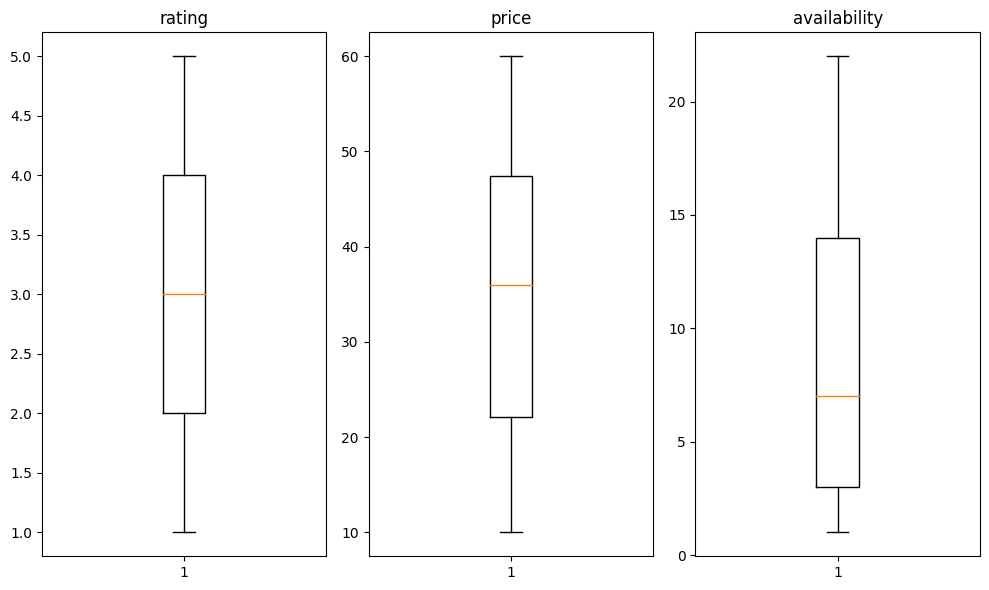

In [17]:
# Select numerical columns for box plot
numerical_columns = ['rating', 'price', 'availability']

# Create box plots for numerical columns
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    plt.boxplot(books[column])
    plt.title(column)
  
plt.tight_layout()
plt.show()

In [18]:
%%writefile functions.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to show outliers using boxplot
def show_outliers(dataframe):
    sns.boxplot(data=dataframe)
    # You can customize the plot as per your preference
    # For example, you can set labels and title using plt.xlabel(), plt.ylabel(), and plt.title()
    plt.show()

# Function to show correlation matrix
def show_correlation_matrix(dataframe):
    corr_matrix = dataframe.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
    plt.show()

# General preprocessing function 
def preprocess_data(dataframe):
    # Example: Handling missing values by dropping rows with missing values
    dataframe = dataframe.dropna()
    # You can add more preprocessing steps as per your requirements
    return dataframe

# Function to show distribution using histogram
def show_distribution(dataframe, column):
    sns.histplot(data=dataframe, x=column)
    plt.show()



Overwriting functions.py


#### Boxplot

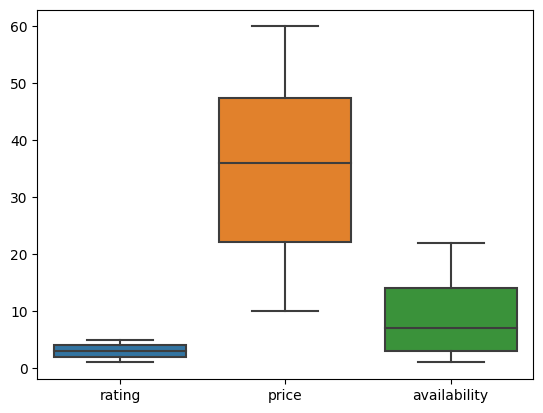

In [19]:
import functions
# Show outliers using boxplot
functions.show_outliers(books)

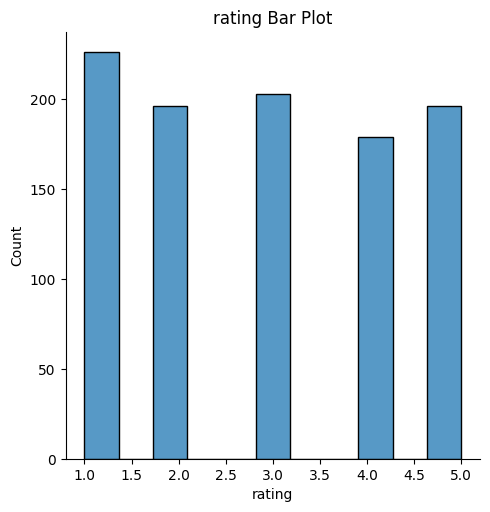

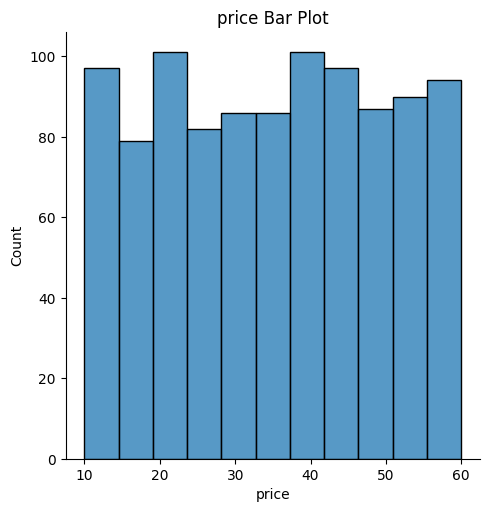

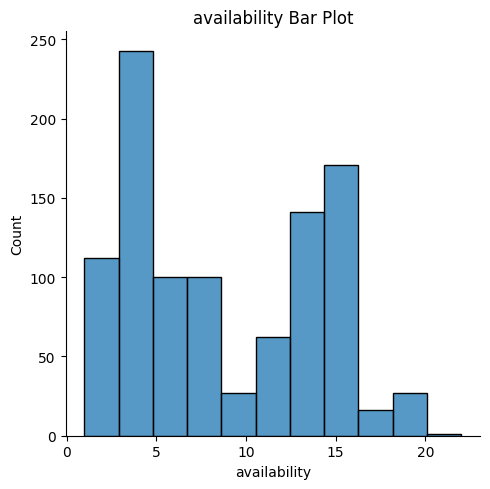

In [20]:
# Create bar plot for numerical columns

for i, column in enumerate(numerical_columns):
    #plt.subplot(1, len(numerical_columns), i+1)
    sns.displot(books[column])
    plt.title(column + ' Bar Plot')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [21]:
books.describe()

,rating,price,availability
count,1000.000000,1000.00000,1000.000000
mean,2.923000,35.07035,8.585000
std,1.434967,14.44669,5.654622
min,1.000000,10.00000,1.000000
25%,2.000000,22.10750,3.000000
50%,3.000000,35.98000,7.000000
75%,4.000000,47.45750,14.000000
max,5.000000,59.99000,22.000000


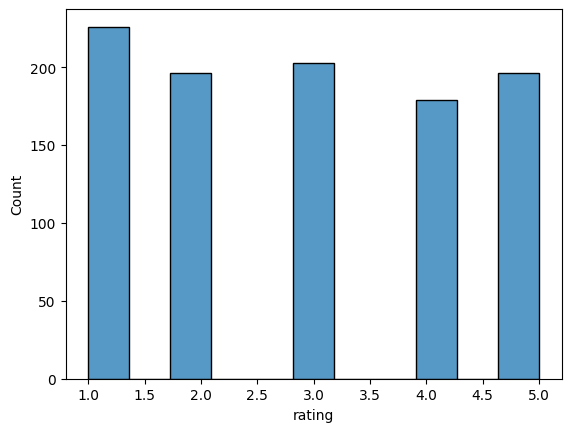

In [22]:
# Show distribution of 'rating' using histogram
functions.show_distribution(books, 'rating')

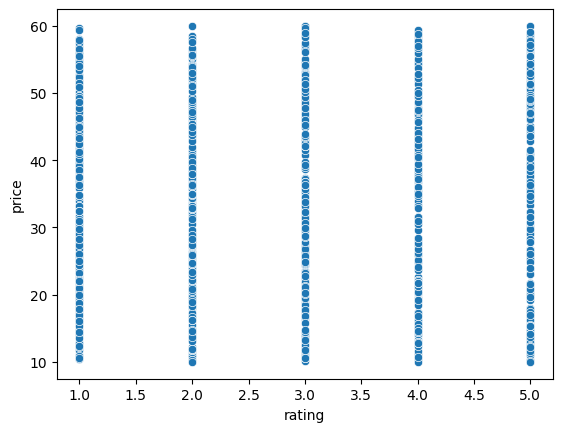

In [23]:
# Show relation between rating and price
sns.scatterplot(data=books, x='rating', y='price')
plt.show()


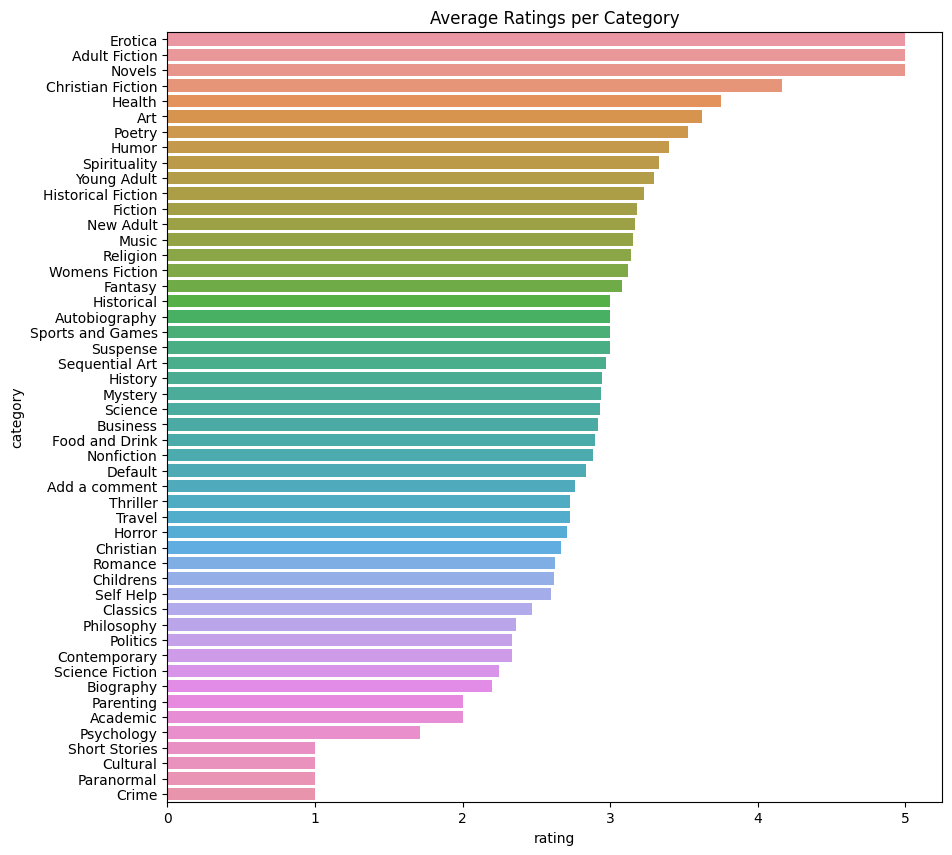

In [24]:
ratings_per_category = books.groupby('category')['rating'].mean().reset_index()

# Sort the ratings in descending order
ratings_per_category = ratings_per_category.sort_values('rating', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='rating', y='category', data=ratings_per_category)
plt.title('Average Ratings per Category')
plt.xlabel('rating')
plt.ylabel('category')

plt.show()

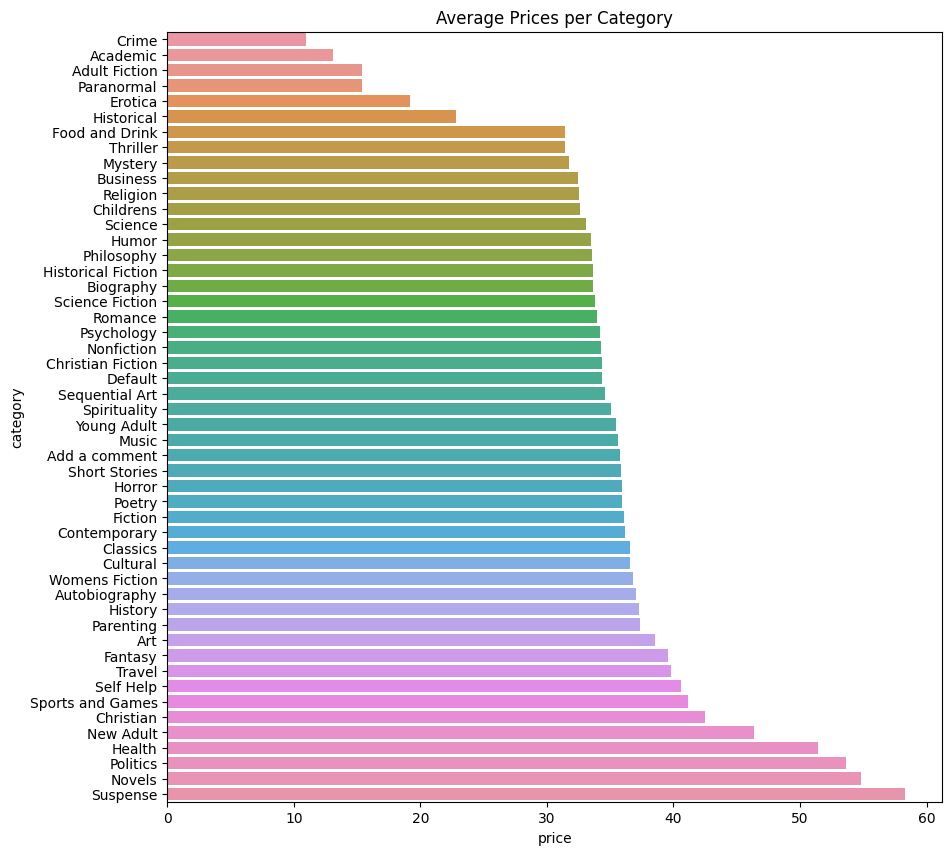

In [25]:
# Group the data by category and calculate the mean price
prices_per_category = books.groupby('category')['price'].mean().reset_index()

# Sort the prices in ascending order
prices_per_category = prices_per_category.sort_values('price', ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x='price', y='category', data=prices_per_category)
plt.title('Average Prices per Category')
plt.xlabel('price')
plt.ylabel('category')

plt.show()

### Skewness

In [26]:
# Select the numerical columns
numerical_columns = ['rating', 'price', 'availability']

# Calculate the skewness of each numerical column
skewness = books[numerical_columns].skew()

# Print the skewness values
print(skewness)

rating          0.074218
price          -0.037515
availability    0.212152
dtype: float64


Rating: The skewness value of 0.074218 indicates that the distribution of ratings is relatively symmetric. This suggests that the ratings are not heavily skewed to one side or the other.

Price: The skewness value of -0.037515 suggests a slightly negative skewness. This means that the distribution of prices may have a slightly longer or fatter tail on the left side, indicating a few lower-priced outliers. However, the magnitude of skewness is small, suggesting that the distribution is approximately symmetric.

Availability: The skewness value of 0.212152 indicates a slightly positive skewness. This suggests that the distribution of availability may have a slightly longer or fatter tail on the right side, indicating a few books with higher availability values. However, like the previous features, the magnitude of skewness is small, indicating a relatively symmetric distribution.

Overall, based on the skewness values, it appears that the numerical features in the dataset (Rating, Price, Availability) have approximately symmetric distributions with only slight deviations from perfect symmetry. This implies that the data is relatively balanced without significant outliers or extreme skewness.

## 5. Choose a Recommendation Algorithm

## 7.  Recommendation Model: 

### 1. K-Means

In [27]:
# KMeans -> add the 6-clusters as a new column in youyr datafrmae
# Import libraries 
#from sklearn.cluster import KMeans
# DBSCAN, -> ad DBSCAN clusters to your dataframe
# from sklearn.cluster import AgglomerativeClustering -> add a new column with the clustering membership
"""
for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))
"""
#from sklearn.metrics import silhouette_score

'\nfor linkage in ("ward", "average", "complete", "single"):\n    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)\n    t0 = time()\n    clustering.fit(X_red)\n    print("%s :\t%.2fs" % (linkage, time() - t0))\n'

In [28]:
# Import libraries 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

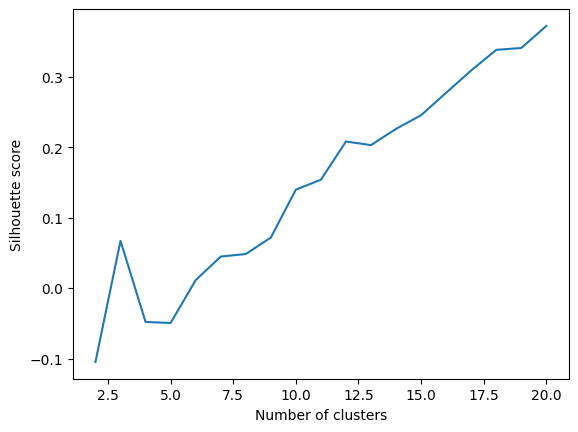

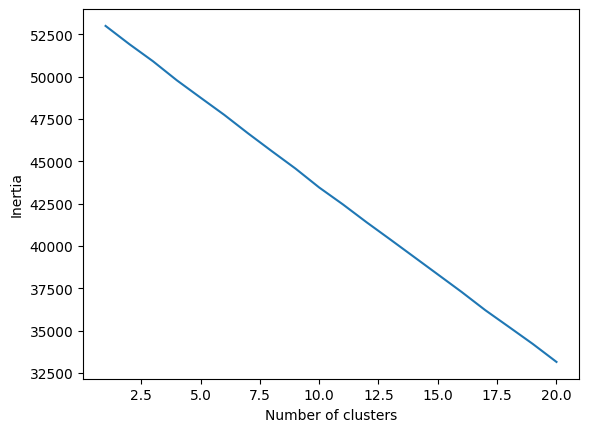

In [31]:
# Determine the optimal number of clusters
# We can use the elbow method to do this
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(encoded_books_scaled_df)
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    inertia.append(kmeans.inertia_)
    
silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(encoded_books_scaled_df)
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(encoded_books_scaled_df, labels))

plt.plot(range(2, 21), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

    

plt.plot(range(1, 21), inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# From the silhouette plot, it looks like 5 and 7 clusters is a good number
1
# Train the K-Means model with 11 clusters
kmeans = KMeans(n_clusters=11, random_state=1234).fit(encoded_books_scaled_df)

In [32]:
books['cluster_kmeans'] = kmeans.predict(encoded_books_scaled_df)
books

,title,category,rating,price,availability,cluster_kmeans
0,A Light in the Attic,Poetry,3,51.77,22,3
1,Tipping the Velvet,Historical Fiction,1,53.74,20,7
2,Soumission,Fiction,1,50.10,20,4
3,Sharp Objects,Mystery,4,47.82,20,6
4,Sapiens: A Brief History of Humankind,History,5,54.23,20,3
...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,1,55.53,1,6
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,4,57.06,1,0
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,5,16.97,1,7
998,1st to Die (Women's Murder Club #1),Mystery,1,53.98,1,6


In [33]:
books['cluster_kmeans'].max()

10

#### 2. DBSCAN

In [46]:
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

##### first model

In [48]:
model = DBSCAN() # eps=0.30, min_samples=9: Default values are: eps=0.5, min_samples=5
# fit model and predict clusters
#model.fit(X)
#yhat = model.predict(X)
yhat = model.fit_predict(encoded_books_scaled_df)

In [49]:
print("The Silhouette score of the model is: ",round(silhouette_score(encoded_books_scaled_df, model.fit_predict(encoded_books_scaled_df)),2))

The Silhouette score of the model is:  -0.34


##### Create an instance of DBSCAN and train the model.

In [50]:
yhat

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2, -1, -1, -1, -1, -1,  2,
        1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6, -1, -1,  3, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1,  4, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  2, -1, -1,  4, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  4, -1

In [54]:
books['cluster_DBSCAN'] = yhat
books.head()

,title,category,rating,price,availability,cluster_kmeans,cluster_DBSCAN
0,A Light in the Attic,Poetry,3,51.77,22,3,-1
1,Tipping the Velvet,Historical Fiction,1,53.74,20,7,-1
2,Soumission,Fiction,1,50.10,20,4,-1
3,Sharp Objects,Mystery,4,47.82,20,6,-1
4,Sapiens: A Brief History of Humankind,History,5,54.23,20,3,-1


In [117]:
books['cluster_DBSCAN'].value_counts()
#books['cluster_kmeans'].value_counts()

cluster_DBSCAN
-1     879
 9      17
 3       9
 13      9
 2       8
 11      7
 10      7
 12      7
 8       6
 14      6
 17      5
 15      5
 1       5
 0       5
 7       5
 5       5
 4       5
 6       5
 16      5
Name: count, dtype: int64

##### Collect the unique cluster predictions

In [55]:
# retrieve unique clusters
clusters = np.unique(yhat)
clusters # DBSCAN flags with "-1" noisy data.

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17])

DBSCAN flags "Noise" points with the "-1" label. Therefore, with the default settings, DBSCAN it's only able to find one cluster.

In [56]:
list(clusters)

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

##### Vizualizing the results

IndexError: list index out of range

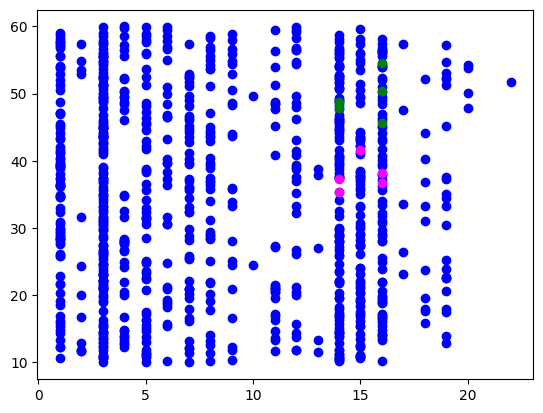

In [87]:
%matplotlib inline
#X_df['clusters'] = clusters
# create scatter plot for samples from each cluster
colors = ["blue","magenta", "green"]
for index, cluster in enumerate(list(clusters)):
	# get row indexes for samples with this cluster
	#row_ix = np.where(yhat == cluster)
	#X_df[X_df['clusters'] == cluster]
	# create scatter of these samples
	#plt.scatter(X[row_ix, 0], X[row_ix, 1])
	if (cluster == -1): 
		c_label = "Noise"
	else:
		c_label = "Cluster_" + str(cluster)
	c_color = colors[index]
	plt.scatter(books[books['cluster_DBSCAN']==cluster]['availability'],books[books['cluster_DBSCAN']==cluster]['price'], color=c_color, label=c_label)
	# plt.scatter(X_df.iloc[row_ix,0],X_df.iloc[row_ix,1])

# show the plot
plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.legend()
plt.show()

### Fine tunning
In order to find out the best value for 𝜖
, we follow these steps:

Compute the distance matrix between the all the observations
We fix the number of nearest neighbours k to MinPoints= 2*number_of_features
We get all the distances from each point to it's k-nearest-neighbourgh.
We sort all those distances in descending order.
We plot those distances.

In [76]:
from scipy.spatial import distance_matrix


d = distance_matrix(encoded_books_scaled_df,encoded_books_scaled_df)
print(d)
print()

[[ 0.          9.75845937  8.49636354 ... 10.70971652 10.08503253
  12.82524825]
 [ 9.75845937  0.          7.48370994 ...  5.05609908  9.11444056
  12.41601448]
 [ 8.49636354  7.48370994  0.         ...  8.96025541  7.75311912
  11.41144504]
 ...
 [10.70971652  5.05609908  8.96025541 ...  0.          9.28002669
  11.48070089]
 [10.08503253  9.11444056  7.75311912 ...  9.28002669  0.
  11.64966674]
 [12.82524825 12.41601448 11.41144504 ... 11.48070089 11.64966674
   0.        ]]



We need to sort this matrix by row and to ignore the first element as it is the distance to every point to itself (ie. 0)

In [77]:
d2 = np.sort(d)[:,1:]
print(d2)

[[ 0.96428877  1.49229983  1.61528235 ... 32.73148615 32.77584772
  32.81381888]
 [ 1.46106801  1.83598992  2.28463249 ... 32.49512076 32.53983564
  32.62483166]
 [ 1.21524088  1.28209974  1.58824796 ... 32.11765899 32.16413622
  32.25010077]
 ...
 [ 0.44182812  0.45370492  0.94847936 ... 32.43720652 32.4742347
  32.4999638 ]
 [ 1.56076339  1.61293023  2.1074925  ... 32.37734303 32.37809282
  32.45000987]
 [ 1.69238441  1.91795402  2.41218791 ... 33.20683491 33.27707947
  33.2855865 ]]


In [79]:
f = d2[:,3]
print(f) # The distances between every point and it's 4th nearest neighbour.

[ 1.68731008  2.72385435  1.62904237  1.48617777  2.59067745  1.29328805
  1.74588411  0.74872056  0.88727622  1.50213336  0.74872056  2.01367381
  1.52239462  1.31357435  2.09774278  2.5389769   2.1035403   2.24330661
 18.50935447  2.1239976   2.83822248  2.37231368  1.10789908  1.59197393
  1.56556776  1.86733044  0.76791923  0.98066408  0.85004134  1.95763854
  3.4792972   0.91144575  2.46150257  1.79017898  3.63038927  0.78291834
  0.60329007  1.01358765  2.62510354  1.66098397  1.55690352  0.71005858
  0.86852438  0.72342483  3.40154149 18.50010914  0.7595193   1.90343623
  0.73237968  1.4444547   1.46154306  0.86612663  0.78983137  0.80743671
  0.90814644  1.50213336  2.10349623  1.48808903  0.96432775  1.13646874
  0.40121014  0.96678563  2.45426684  0.79430628  0.77165162  0.8849028
  0.84528165  1.19348514  2.8221384  16.09006994  0.82937242  1.4792589
  2.80412539  0.7082036   0.6842359   1.43264436  1.26528238  0.72062679
  0.55527906  0.39642074  0.73748134  1.61208632  0.8

##### Plot distances 

In [80]:
f_final = np.sort(f)[::-1]
print()
print(f_final)


[31.7708802  31.77038992 31.77015702 31.76971021 31.76906967 31.76882468
 31.76452604 31.76386257 31.76378318 31.76298927 22.56557072 22.56243453
 18.50935447 18.50618067 18.50563411 18.50097648 18.50010914 18.49819611
 18.49803064 18.49644832 18.49620396 16.09669928 16.09183532 16.09006994
 16.08719501  3.89923196  3.63038927  3.61359234  3.4792972   3.43347216
  3.40154149  3.40154149  3.30297786  3.30297786  3.30283846  3.26991492
  3.23297645  3.21939344  3.18011307  3.13197384  3.13197384  3.05899898
  3.0388822   3.03502734  2.94935462  2.94935462  2.8577908   2.8577908
  2.85503207  2.8478872   2.83822248  2.8221384   2.8221384   2.80412539
  2.80412539  2.77673382  2.75545662  2.72385435  2.68337911  2.66429763
  2.64596564  2.63211072  2.62510354  2.62510354  2.6135492   2.60192233
  2.59640561  2.59067745  2.590202    2.56950225  2.55299013  2.55299013
  2.55059253  2.54456453  2.54389015  2.5389769   2.51999645  2.51828157
  2.51650592  2.51362991  2.47288541  2.46150257  2

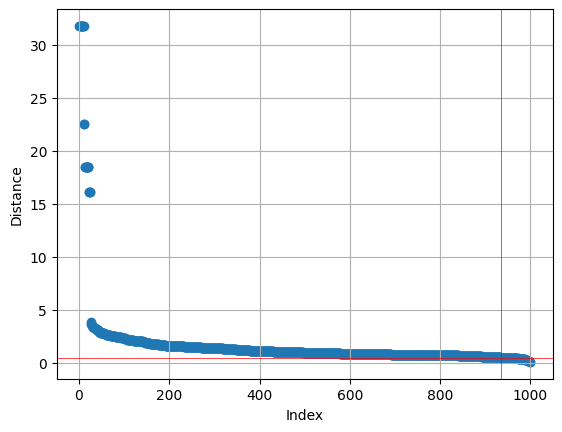

In [81]:
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Index")
plt.ylabel("Distance")
# Get the index of the distance which is closer to 0.5 as 0.5 is the default value for epsilon in DBSCAN
min_index = np.argmin(np.abs(f_final - 0.5))
xnew = min_index
ynew = f_final[min_index]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid()#(b=True)
plt.show()

 ##### Exploring Epsilon values
 np.arange(2,5,4,0.01)

In [85]:
 np.arange(2.5,4,0.01)

array([2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.19, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26,
       3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37,
       3.38, 3.39, 3.4 , 3.41, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48,
       3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59,
       3.6 , 3.61, 3.62, 3.63, 3.64, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 ,
       3.71, 3.72, 3.73, 3.74, 3.75, 3.76, 3.77, 3.78, 3.79, 3.8 , 3.81,
       3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.89, 3.9 , 3.91, 3.92,
       3.93, 3.94, 3.95, 3.96, 3.97, 3.98, 3.99])

In [88]:
models = {}

for value in np.arange(2.5, 4, 0.01):
    model = DBSCAN(eps=value, min_samples=4) # min_samples = 2 * #features
    # fit model and predict clusters
    yhat = model.fit_predict(encoded_books_scaled_df)
    score =  round(silhouette_score(encoded_books_scaled_df, model.fit_predict(encoded_books_scaled_df)),2)
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "score": score}

In [91]:
# retrieve unique clusters of one model
clusters2 = np.unique(models["model_3.3"]["yhat"])
clusters2

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35])

In [96]:
models["model_3.3"]["score"]

0.61

In [97]:
len(list(models.keys()))

150

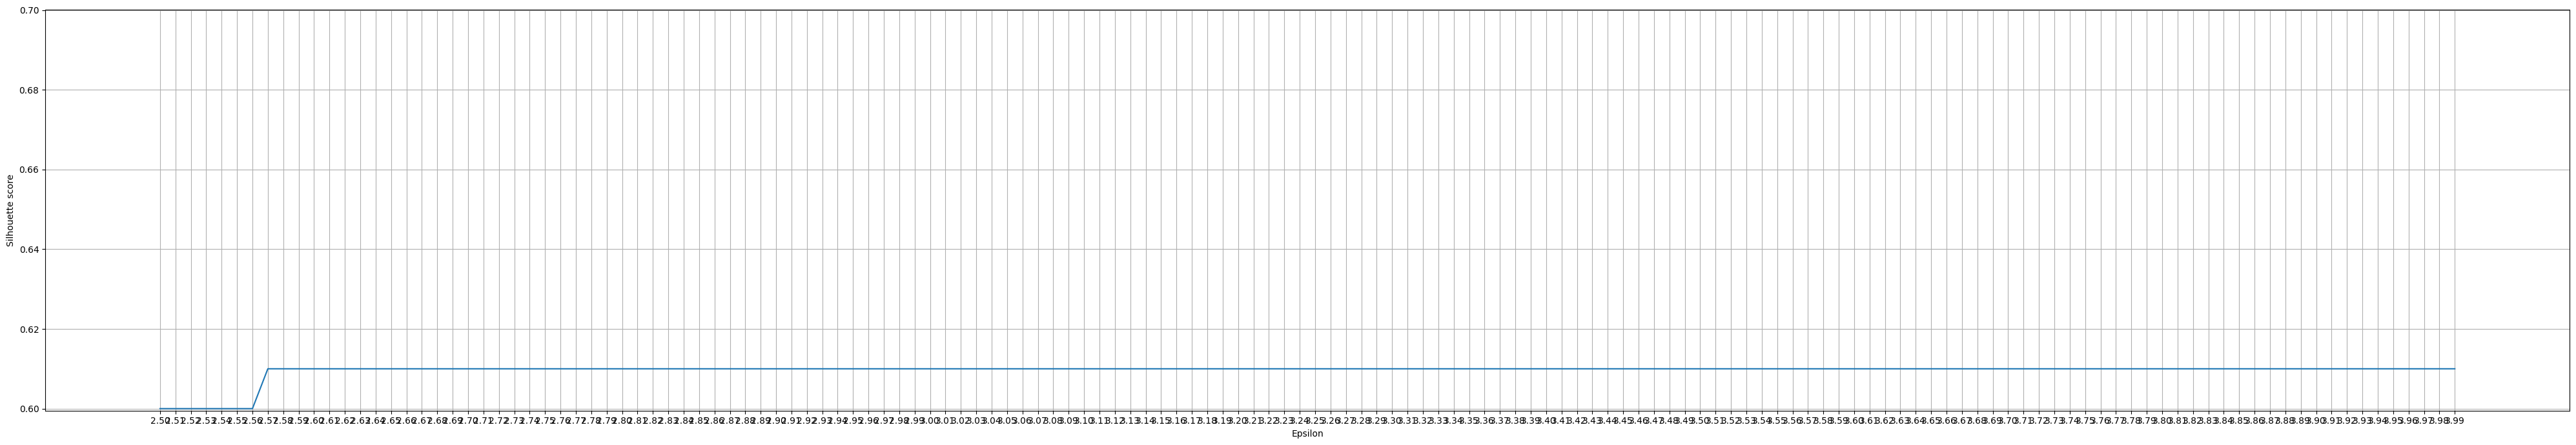

In [108]:
import matplotlib.ticker as ticker

epsilons = [round(value,2) for value in np.arange(2.5,4,0.01)]
scores = [item[1]["score"] for item in list(models.items())]

fig, ax = plt.subplots(figsize=(40,7))
ax.plot(epsilons, scores)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Silhouette score")
ax.xaxis.set_ticks(np.arange(min(epsilons), max(epsilons), 0.01))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_ticks(np.arange(min(scores), max(scores)+0.1, 0.02))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.grid()
plt.tight_layout()
plt.show()

#### 3. AgglomerativeClustering

In [118]:
from sklearn.cluster import AgglomerativeClustering


# Perform Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=10)  
cluster_labels = agglomerative.fit_predict(encoded_books_scaled_df)

# Add the cluster labels to the original DataFrame
books['cluster_agglo'] = cluster_labels


In [119]:
books

,title,category,rating,price,availability,cluster_kmeans,cluster_DBSCAN,cluster_agglo
0,A Light in the Attic,Poetry,3,51.77,22,3,-1,0
1,Tipping the Velvet,Historical Fiction,1,53.74,20,7,-1,1
2,Soumission,Fiction,1,50.10,20,4,-1,6
3,Sharp Objects,Mystery,4,47.82,20,6,-1,0
4,Sapiens: A Brief History of Humankind,History,5,54.23,20,3,-1,0
...,...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,1,55.53,1,6,-1,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,4,57.06,1,0,-1,4
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,5,16.97,1,7,-1,1
998,1st to Die (Women's Murder Club #1),Mystery,1,53.98,1,6,-1,0


In [126]:
books[books["cluster_agglo"] == 3]

,title,category,rating,price,availability,cluster_kmeans,cluster_DBSCAN,cluster_agglo
7,The Coming Woman: A Novel Based on the Life of...,Default,3,17.93,19,3,-1,3
8,The Boys in the Boat: Nine Americans and Their...,Default,4,22.60,19,3,-1,3
10,"Starving Hearts (Triangular Trade Trilogy, #1)",Default,2,13.99,19,3,-1,3
26,America's Cradle of Quarterbacks: Western Penn...,Default,3,22.50,19,3,-1,3
27,Aladdin and His Wonderful Lamp,Default,3,53.13,19,3,-1,3
...,...,...,...,...,...,...,...,...
947,Shatter Me (Shatter Me #1),Default,1,42.40,1,3,9,3
955,Paradise Lost (Paradise #1),Default,1,24.96,1,3,9,3
960,On the Road (Duluoz Legend),Default,3,32.36,1,3,-1,3
973,Jane Eyre,Default,5,38.43,1,3,10,3


In [138]:
keyword = input("Enter keyword: ")

sel = books[books["title"].str.contains(keyword, case=False)]
for i,row in sel.iterrows():
    print(row["title"] + " (" + row["category"] + ")")

Enter keyword: wonder
Aladdin and His Wonderful Lamp (Default)
Unseen City: The Majesty of Pigeons, the Discreet Charm of Snails & Other Wonders of the Urban Wilderness (Nonfiction)
Wonder Woman: Earth One, Volume One (Wonder Woman: Earth One #1) (Sequential Art)
Walt Disney's Alice in Wonderland (Childrens)
Lust & Wonder (Autobiography)
Alice in Wonderland (Alice's Adventures in Wonderland #1) (Classics)


In [141]:
user_selected = 947

cluster = books.iloc[user_selected]["cluster_agglo"]

books[books["cluster_agglo"] == cluster].sample(3)

,title,category,rating,price,availability,cluster_kmeans,cluster_DBSCAN,cluster_agglo
603,The 5th Wave (The 5th Wave #1),Default,2,11.83,5,3,-1,3
379,How to Speak Golf: An Illustrated Guide to Lin...,Default,5,58.32,12,3,-1,3
645,Vogue Colors A to Z: A Fashion Coloring Book,Default,4,52.35,4,3,-1,3


In [142]:
# Save the DataFrame to a CSV file
books.to_csv('../Data/books_extended.csv', index=False)

print("DataFrame has been saved to CSV successfully.")

DataFrame has been saved to CSV successfully.
